# Fitting Bootstrap Analysis, Chaotic

In [1]:
import sys
sys.path.insert(0, '../../../../src_tf/')

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


from utils import saver, loader
from spectrum import complex_spacing_ratio, channel_spectrum, Spectrum, coat_spectrum, spectrum_to_angular, spectrum_to_radial
from analysis import spectrum_to_angular, spectrum_to_radial, hist_ensamble, scatterplot_bootstrap, scatterplot_stats

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=1)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


In [2]:
model_list = []
for i in range(10):
    model = loader(f"models/chaotic_bootstrap_{i}.model")
    model_list.extend(model)

spectrum_bootstrap_list = [channel_spectrum(model.channel) for model in model_list]

csr_bootstrap_list = [complex_spacing_ratio(spectrum) for spectrum in spectrum_bootstrap_list]

[channel_numeric_list, spectrum_numeric_list, csr_numeric_list] = loader("data/chaotic_synthetic_benchmark.pkl")

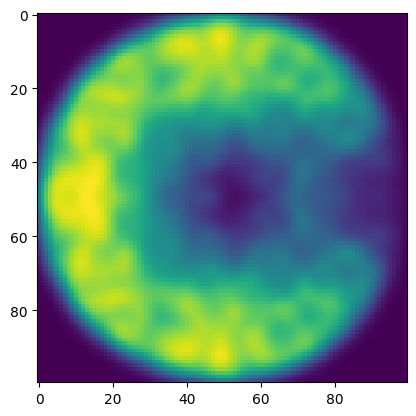

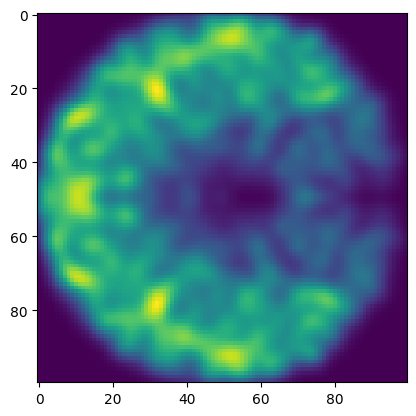

In [3]:
csr_bootstrap_coat = coat_spectrum(Spectrum(csr_bootstrap_list), sigma=0.05)
plt.imshow(csr_bootstrap_coat)
plt.show()

csr_numerical_coat = coat_spectrum(Spectrum(csr_numeric_list), sigma=0.05)
plt.imshow(csr_numerical_coat)
plt.show()

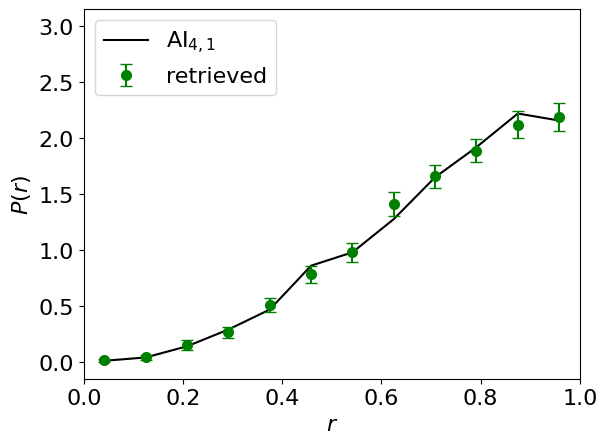

In [4]:
bins, radial_num_mean, radial_num_err = hist_ensamble(spectrum_to_radial(csr_numeric_list), bins=np.linspace(0, 1, 13), density=True)

radial_mean_list = []
radial_std_list = []
for i in range(10):
    bins, radial_exp_mean, radial_exp_err = hist_ensamble(spectrum_to_radial(csr_bootstrap_list[10*i:10*(i+1)]), bins=np.linspace(0, 1, 13), density=True)
    radial_mean_list.append(radial_exp_mean)
    radial_std_list.append(radial_exp_err)

radial_exp_mean = np.mean(radial_mean_list, axis=0)
radial_std_list = np.array(radial_std_list)
radial_std = np.sqrt(np.mean(radial_std_list**2, axis=0))/np.sqrt(10)

plt.plot(bins, radial_num_mean, "k-",  label='$\\text{AI}_{4,1}$', )
plt.errorbar(bins, radial_exp_mean, radial_std, fmt='go', markersize=7, capsize=4, label='retrieved')

plt.legend(fontsize=16, loc="upper left")
plt.xlim(0, 1)
plt.xlabel(r"$r$", fontsize=16)
plt.ylabel(r"$P(r)$", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-0.15, 3.15)
plt.savefig("figures/radial_csr_nonintegrable.svg", bbox_inches='tight')
plt.show()

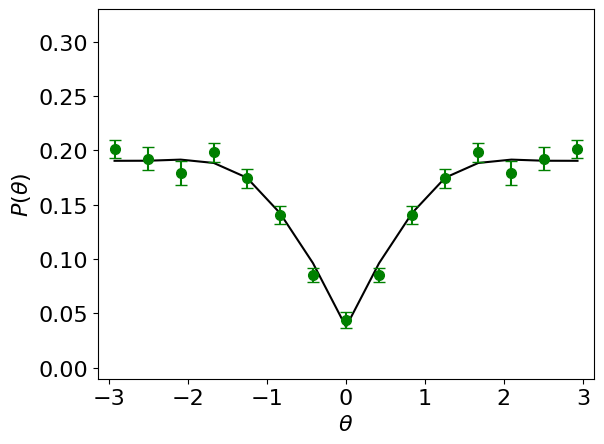

In [5]:
bins, angular_num_mean, angular_num_err = hist_ensamble(spectrum_to_angular(csr_numeric_list), bins=np.linspace(-np.pi, np.pi, 16), density=True)

angular_mean_list = []
angular_std_list = []
for i in range(10):
    bins, angular_exp_mean, angular_exp_err = hist_ensamble(spectrum_to_angular(csr_bootstrap_list[10*i:10*(i+1)]), bins=np.linspace(-np.pi, np.pi, 16), density=True)
    angular_mean_list.append(angular_exp_mean)
    angular_std_list.append(angular_exp_err)

angular_exp_mean = np.mean(angular_mean_list, axis=0)
angular_std_list = np.array(angular_std_list)
angular_std = np.sqrt(np.mean(angular_std_list**2, axis=0))/np.sqrt(10)


plt.plot(bins, angular_num_mean, "k-")
plt.errorbar(bins, angular_exp_mean, angular_std, fmt='go', markersize=7, capsize=4)


#plt.legend(fontsize=16)
plt.xlim(-np.pi, np.pi)
plt.xlabel(r'$\theta$', fontsize=16)
plt.ylabel(r'$P(\theta)$', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-0.01, 0.33)
plt.savefig("figures/angular_csr_nonintegrable.svg", bbox_inches='tight')
plt.show()

## Scatter Plot

In [6]:
r_numeric, a_numeric = scatterplot_stats(spectrum_to_radial(csr_numeric_list), spectrum_to_angular(csr_numeric_list))

print("r_numeric", r_numeric)
print("a_numeric", a_numeric)

r_numeric 0.7267951581650467
a_numeric 0.17035175666549446


In [7]:
r_mean_list = []
r_std_list = []

a_mean_list = []
a_std_list = []

for i in range(10):
    csr_bootstrap = csr_bootstrap_list[10*i:10*(i+1)]
    r_mean, r_std, a_mean, a_std = scatterplot_bootstrap(csr_bootstrap)
    r_mean_list.append(r_mean)
    r_std_list.append(r_std)
    a_mean_list.append(a_mean)
    a_std_list.append(a_std)
    

r_mean = np.mean(r_mean_list, axis=0)
r_std = np.sqrt(np.mean(np.array(r_std_list)**2))/np.sqrt(10)

a_mean = np.mean(a_mean_list, axis=0)
a_std = np.sqrt(np.mean(np.array(a_std_list)**2))/np.sqrt(10)
        

In [8]:
print(r_mean, r_std)
print(a_mean, a_std)

print(r_numeric)
print(a_numeric)

0.7250973307561763 0.0032885034864358806
0.18127234872471543 0.010821070619502875
0.7267951581650467
0.17035175666549446
